# Tehtävä 2-1. Aihe: Neuroverkko käsin: 4 pistettä

In [1]:
# Kirjoita tähän tietosi!
student_name = 'Opiskelijan nimi tai Opiskelijoiden nimet'  # Oma nimesi
student_id = 'JAMK-opiskelijatunnus tai JAMK-opiskelijatunnukset' # Oma opiskelijatunnuksesi JAMK:ssa 

Tehtävässä on määritetty koordinaattipareja, joiden avulla on piirretty kaksi eri väristä pisteitä.
Tavoitteena on luoda neuroverkko, joka jakaa kuvaajan punaiseen ja siniseen alueeseen.
Kun kuvaajaan piirretään uusi piste ja pisteen koordinaatit syötetään neuroverkolle, neuroverkko ennustaa,
minkä värinen piste on ja samalla sen, että millä todennäköisyydellä se on sen värinen.

1. Luo opetusdatan koordinaattipisteet sekä värit ominaisuuksiin ja ennustettaviin arvoihin.
2. Luo neuroverkkoluokka, jonka rakenne on:
    * Sisääntulokerros, jossa on kaksi neuronia (x, y) - eli koordinaatit pisteelle
    * Yksi piilotettua kerros, jossa on 6 neuronia ja aktivointifunktiona sigmoid.
    * Ulostulokerros, jossa yksi neuroni ja aktivointifunktiona sigmoid.
    * Ulostulokerroksen tulos on siis numeerinen arvo (float) väliltä [0, 1]
3. Luo funktiot, joiden avulla lasket neuroverkon ennustuksen syöttödatalle (forwardpropagation) ja päivität yhteyksien painoarvoja virheen avulla (backpropagation)
4. Syötä koulutusdata 1000 kertaa neuroverkon läpi.
    * Syötä jokaisella kierroksella koulutusdata rivi riviltä neuroverkon läpi ja päivitä painoarvot.
    * Tallenna kierroksen aikana virheet jokaiselle syötölle, ja lisää kierroksen virheistä keskiarvo listaan. Piirrä kuvaaja siitä, kuinka virhe muuttuu koulutuksen aikana
5. Ennusta neuroverkolla (float-arvo), minkä värinen on piste: [0.5, 8.7]. Kuinka tarkka ennuste mielestäsi on?
6. Ennusta neuroverkolla (float-arvo), minkä värinen on piste: [15, -15]. Kuinka tarkka ennuste mielestäsi on?
7. Tutki miten backpropagation()-metodin learning_rate-argumentin muutos vaikuttaa (0.01 -- 0.001) tulokseen?
8. Tutki miten make_blobs()-funktion n_samples-ominaisuuden muuttaminen vaikuttaa tulokseen?
9. Tutki miten make_blobs()-funktion cluster_std-ominaisuuden muuttaminen vaikuttaa tulokseen?


Vinkkejä:
* Piirrä neuroverkon rakenne piirrustusohjelmalla tai paperille, näet silloin yhteyksien määrän jokaisessa kerroksessa.
* Käytä olemassa olevaa ratkaisua materiaaleista, lisää siihen tarvittavat laskut jokaiselle kerrokselle.

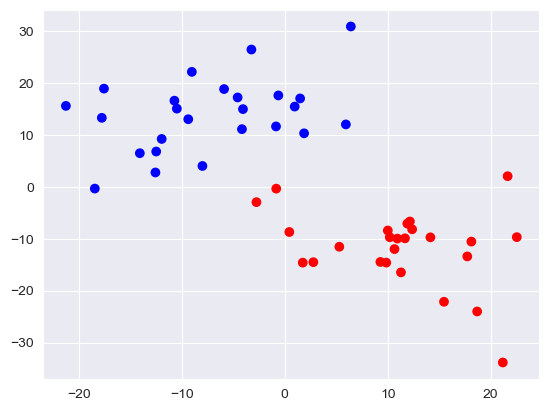

In [2]:
# tehtävässä käytetään make_blobs()-funktiota, jota voi käyttää testidatasetin piirtoon
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
dots, labels = make_blobs(n_samples=50, centers=2, cluster_std=8, center_box=(-20, 20), random_state=151)
colors = ['red' if label == 0 else 'blue' for label in labels]
plt.scatter(dots[:,0],dots[:,1],color=colors)

In [3]:
import numpy as np

# Tehtävän toteutus - tämä on valmis luokka käytettäväksi
class NeuralNetwork:
    def __init__(self):
        self.weights1 = np.random.rand(2, 6)
        self.weights2 = np.random.rand(6, 1)

    def __init__(self, input_neurons, hidden_neurons):
        self.weights1 = np.random.rand(input_neurons, hidden_neurons)
        self.weights2 = np.random.rand(hidden_neurons, 1)

    # Virhefunktio
    def loss_function(self, true, prediction):
        return 0.5 * (true - prediction) ** 2

    # Virhefunktion derivaatta
    def loss_function_derivative(self, true, prediction):
        return true - prediction

    # Sigmoid funktio
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Sigmoidin derivaatta
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    # Neuroverkon läpikäynti
    def forwardpropagation(self, X, y):
        self.X = X
        self.y = y
        self.layer1 = self.sigmoid(np.dot(self.X, self.weights1))
        self.output = self.sigmoid(np.dot(self.layer1, self.weights2))

        # lasketaan häviö eli neuroverkon ennustuksen etäisyys oikeasta arvosta
        self.loss = self.loss_function(self.y, self.output)

    # Painoarvojen päivitys backpropagation - menetelmällä
    def backpropagation(self, learning_rate):
        output_error = self.loss_function_derivative(self.y, self.output)
        output_delta = output_error * self.sigmoid_derivative(self.output)
        weights2_adjustment = np.dot(self.layer1.T, output_delta)

        layer1_error = np.dot(output_delta, self.weights2.T)
        layer1_delta = layer1_error * self.sigmoid_derivative(self.layer1)
        weights1_adjustment = np.dot(self.X.T, layer1_delta)

        self.weights1 += learning_rate * weights1_adjustment
        self.weights2 += learning_rate * weights2_adjustment


 `create_dots_and_labels()`: luodaan pisteet ja nimekkeet sekä nimikkeiden pohjalta asetetaan RGB-väri pisteelle.
 * Opiskelijan tulee toteuttaa seuraava: Luo väritaulukko, jossa väri on `[label: 0: "red" tai 1: "blue"]`
 * Selvitä miten `make_blobs()` toimii

 `train_neural_network()`: Kouluttaa neuroverkon ja tallentaa häviön joka epoch-kierroksen jälkeen (valmis toteutus)

ks. **TODO** -kohdat, jotka vaativat oman koodin kirjoittamista

In [4]:
# funktio palauttaa taulukon, jossa on [dots, labels, colors]
def create_dots_and_labels():
    # TODO: Tutki miten make_blobs()-funktion cluster_std-ominaisuuden kasvattaminen vaikuttaa tulokseen?
    dots, labels = make_blobs(n_samples=50, centers=2, cluster_std=8, center_box=(-20, 20), random_state=151)
    colors = []
    # Luo väritaulukko, jossa väri on ["red" tai "blue"]
    # TODO: luo colors-väritaulukko labels-taulukon arvojen pohjalta

    return [dots, labels, colors]

# Kouluttaa neuroverkon ja tallentaa häviön joka epoch-kierroksen jälkeen (valmis toteutus)
def train_neural_network(ntwrk, train_X, train_y):
    losses_arr = []  # tallentaa kierroksen virheet
    epochs = 1000
    for epoch in range(epochs):
        batch_losses = []
        # Käydään jokaisessa kierroksessa jokainen koordinaattipari läpi
        for X, y in zip(train_X, train_y):
            ntwrk.forwardpropagation(np.array([X]), np.array([y]))
            # TODO: Tutki Miten learning_rate muutos vaikuttaa (0.01 - 0.001) tulokseen?
            ntwrk.backpropagation(learning_rate=0.01)
            batch_losses.append(ntwrk.loss[0])
        losses_arr.append(np.average(batch_losses))  # lasketaan keskiarvo yhden kierroksen virhearvoista
    return losses_arr


* Määritetään koulutusdata ja luodaan neuroverkko
    * create_dots_and_labels
* Piirretään pisteet (kuviotyyppinä `scatter plot`)
* Koulutetaan neuroverkkoa  ja otetaan joka kierroksen jälkeen neuroverkon häviö ylos

In [5]:
# Tehtävän toteutus jatkuu tästä

# TODO: Luodaan ja koulututaan neuroverkko
# ... NeuralNetwork(sisaantulokerroksen_neuronit, piilokerroksen_neuronit) # ks. ohjeen kohta 2.
# ... train_neural_network(...)

# TODO: Luodaan ja koulututaan neuroverkko ja otetaan joka kierroksen jälkeen neuroverkon häviö ylos

Piirretään neuroverkon häviöt

In [6]:
# TODO: Piirretään neuroverkon häviöt
import matplotlib.pyplot as plt


### Lasketaan ennusteet
* laske `output1`-muuttujaan neuroverkon ennuste syötteelle `[0.5, 8.7]`.
* laske `output2`-muuttujaan neuroverkon ennuste syötteelle `[-30, -30]`.


In [7]:
# Tehtävän toteutus

# TODO: Ennusteiden laskeminen yo. kahdelle pisteille

# TODO: Lasketaan ennuste ensimmäiselle syötteelle
test_X_nn = np.array([0.5, 8.7])
# layer1_output = neural_network.sigmoid(np.dot(numpy_array, painoarvot))
# annetaan edellisen kerroksen tulokset ja toiset painoarvot edellä käytetylle funktiolle
output1 = [0.9]  # TODO: Alustettu ettei tule virheitä. Arvo on laskettava

test_X_nn2 = np.array([15, -15])
# TODO: Lasketaan ennuste toiselle syötteelle

output2 = [0.1]   # TODO: Alustettu ettei tule virheitä. Arvo on laskettava


In [8]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.
print(output1)
print(output2)

[0.9]
[0.1]


# Tehtävä 2-2
# Aihe: Yksinkertainen neuroverkko Keras Sequential API:lla (max. 3 p)

Koulutetaan yksinkertainen neuroverkko **Keras**-rajapinnalla käyttäen `titanic-dataa`
Datan saat osoitteesta: `https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv`

Tehtävästä on löydyttävä vaiheet:
1. Valitse Titanic-datasta vain kolme-neljä tärkeää feature-piirrettä tehtävään
   * tästä aineistosta on ollut esimerkkejä jo koneoppimisen puolella (ja niitä voi lainata tai soveltaa), mutta tätä voi halutessaan myös itse tutkia tarkemmin
2. Luo neuroverkko (käytä `tf.keras.Sequential()`-metodia)
3. Määritä häviöfunktio ja optimisaattori (käytä `model.compile()`-metodia)
4. Kouluta neuroverkko (käytä `model.fit()`-metodia)
5. Vertaa neuroverkon antamia ennustuksia testidataan (käytä `model.evaluate()`-metodia)
6. Tulosta välikierrosten (`epoch`) tulokset konsolille.
 ```
 23/23 [==============================] - 0s 687us/step - loss: 2.2182 - accuracy: 0.6236
 Epoch 2/1000
 23/23 [==============================] - 0s 702us/step - loss: 1.4468 - accuracy: 0.6238
 ```
7. Muuta neuroverkon rakennetta ja yritä dokumentoida neuroverkko, jolla sait parhaat tulokset.

Myös epoch-kierrosmäärien vaikutusta voi testata, mutta arvauksena on, että max. 1000 opetuskierrosta riittää varmasti hyvin.
Useita neuroverkkorakenteita kannattaa kokeilla ja hieman vertailla oppimistuloksia.


### Datan esikäsittely + Keras - Titanic-data

Versio, jossa pyritään hakemaan 3-4 tärkeintä piirrettä, jotka korreloivat eniten `survived`-kentän (luokkamuuttujan) kanssa.


In [9]:
# Tehtävän toteutus
# Datan Esikäsittely

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv')

print(df.head())
# TODO: esikäsittelyn loppu toteutus

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [10]:
# Jos tulee sertifikaatti vanhentunut -virhe, niin ao. koodi auttaa.
# Toinen vaihtoeho on että vain kopioi CSV-tiedoston omaan repoon tehtävän tekemistä varten
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv')


### Aineiston jakaminen
* Irrotetaan ennustettava muuttuja datasta.
* jaetaan data opetus- ja testidataan.


In [11]:
# Tehtävän toteutus

# TODO: Irrotetaan datasta ennustettava luokkamuuttuja

# TODO: Jako opetus- ja testidataan

### Tehtävän toteutus Keras-kirjastoa käyttäen

Luodaan neuroverkko, jossa on `Dense`-kerroksia peräkkäin (`Sequential`). Määritä nämä kaksi parametriä ainakin:
* `units` – dimensionality of the output space.
* `activation` – Activation function to use. If you don't specify anything, no activation is applied

Huom! Useita neuroverkkorakenteita kannattaa kokeilla ja hieman vertailla oppimistuloksia.

In [12]:
# Tehtävät toteutus
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

# TODO: Luodaan neuroverkko
#
# model = tf.keras.Sequential([
#  tf.keras.layers.Dense(...),

* Määritetään häviöfunktio ja optimisaattori.
* Koulutetaan neuroverkko (epochs=100-1000)
* Verrataan tuloksia testidataan

In [13]:
# Tehtävän toteutus

# TODO: Käännä malli
# TODO: Kouluta neuroverkko n epoch-kierrosta

# TODO: Vertaa saatuja oppimistuloksia testidataan
results = [.001, .001] # TODO: Alustettu ettei tule virheitä. Tulokset laskettava tehtävä

In [14]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita results - muuttujaan funktion model.evaluate() tulos.
# TODO: Muista määrittää model.compile() - funktioon seurattavaksi suureeksi metrics=['accuracy'] neuroverkon ennustuksien tarkkuuden määrittelemiseksi.
print(f"Test Loss:{results[0]} Test Accuracy:{results[1]*100}%")

Test Loss:0.001 Test Accuracy:0.1%


Tehtävän tuloksesta:
Test Accuracy: > n. 80 % -- on jo aika hyvä, mutta toki parempaakin saa hakea (jos haluaa käyttää paljon ylimääräistä aikaa)
